# Root finding

# What does root mean
* if there is a function $f(x)= x^2-11$  
* root means when $f(x)=0$ for which $x$ $f(x)=0$  
* in other words if you have anything that is equal to zero find variables the    
* $0=x^2-11$ and you find $x$ so the $RHS$ equals $LHS$  
* in this example $x=\sqrt(11)$

<table><tr>
<td> <img src="imgs/root_finding_1.png" width="500" /> </td>
</tr></table>

# Lets imagine we know the function or we can calculate the value of the funcion (not just points in csv file...)

<table><tr>
<td> <img src="imgs/root_finding_2.png" width="800" /> </td>
</tr></table>

<table><tr>
<td> <img src="imgs/root_finding_3.png" width="600" /> </td>
</tr></table>

## There are two most common methods
* bisection method
* Newton-Rapson

# Steps
* visualize the function
* choose the method
* bracketing the function so it changes the values between the brackets
* verify the results

## Bisection method
* reliable if good brackets
* slow
* may give oscillations around the root

<table><tr>
<td> <img src="imgs/root_finding_4.png" width="600" /> </td>
</tr></table>

<table><tr>
<td> <img src="imgs/root_finding_5.png" width="600" /> </td>
</tr></table>

### important equations:
* new point
$$x_n = \frac{(x_l+x_r)}{2}$$

* tolerance is a value that we are willing to accept
$$root = abs(f(\frac{(x_l+x_r)}{2}))$$

* if abs(f(x_n))<tol ##STOP
* tol=0.01              
* tol=0.001                            
* tol=0.0001 ...                            

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f_cost(x):
    return x**2-11

3.3166247903554

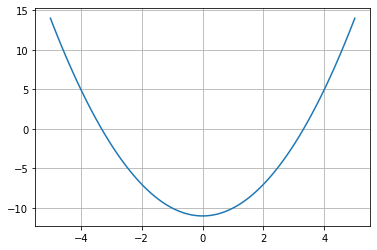

In [3]:
x=np.linspace(-5,5,100)
fig,ax = plt.subplots(1,1)
ax.plot(x,f_cost(x))
ax.grid('True')
np.sqrt(11)

In [4]:
# initializing points
tol=0.1
xl=3
xr=4

In [5]:
# checking if root is between those points
f_cost(xl)*f_cost(xr)

-10

In [6]:
# finding new point
xn=(xl+xr)/2
print(xn)

3.5


In [7]:
# checking if the root is between those points
f_cost(xl)*f_cost(xn)

-2.5

In [8]:
# its negative for the same xl and for new xr that means that xn is good as my new xr  
xr=xn

In [9]:
# thesting the value of the function at root (should be as close to zero as possible)
abs(f_cost((xl+xr)/2))
# still far from tolerance so I keep going

0.4375

In [10]:
# finding new point
xn=(xl+xr)/2

In [11]:
# testing if the function changes sign
f_cost(xl)*f_cost(xn)

0.875

In [12]:
# it does NOT, so xn cannot be my new xr!, that means that xl=xn
xl=xn

In [13]:
# testing the value of the function at this points
abs(f_cost((xl+xr)/2))

0.390625

In [14]:
# continue 
xn=(xl+xr)/2
print(xn)

3.375


In [15]:
f_cost(xl)*f_cost(xn)

-0.1708984375

In [16]:
xr=xn

In [17]:
abs(f_cost((xl+xr)/2))

0.02734375

In [18]:
# Im happy with my brackets as the value is smaller than tolerance
tol=0.1

etc...

## The  best loop would be a while loop but for is also OK
* choose initial brackets
* create empty list of results of xn
* define tol=0.0001
* make while loop which should continue as long as  abs(f_cost((xl+xr)/2)) > tol
* calculate new point
* check if the f_cost(xl)*f_cost(xn) is negative or positive...
* replace xl or xr with xn depending on the previous result
* if you plot the evolution of x_n you should see oscillations

# In a real life sytuation use PYTHON build-in function
* brentq - bisection
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html

In [19]:
import scipy.optimize as optimize

In [20]:
root = optimize.brentq(f_cost, 3, 4, xtol=1.0e-10) # args=(N0,T,omega) # args to the function
print(root)

3.3166247903554


### but the method has an option to pass some parameters to the function (this is both useful and important!)

In [21]:
def f_cost2(x,a):
    return x**2 - a

In [22]:
# a can be anything, if we choose 11 then it will reduce to the same function as before
a=15
x=np.linspace(0,5,10)
y=f_cost2(x,a)

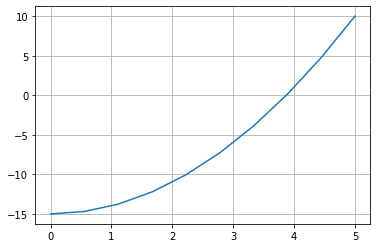

In [23]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
ax.plot(x,y)
ax.grid(True)

In [24]:
# with optimize.brentq we can pass any parameter we want to that function
root = optimize.brentq(f_cost2, 3, 4, args=(15,), xtol=1.0e-10) # args=(N0,T,omega) # args to the function
print(root)

3.872983346206861


## Newton-Rapson method
* very fast
* but we need to know the derivative of the function
* may give oscillations around the root
* in the manual version of Newton Rapson method we need to know the derivative of the function! (analytical formula of it)

<table><tr>
<td> <img src="imgs/root_finding_6.png" width="600" /> </td>
</tr></table>

####  how to read the above:
* derivative (slope) at given point $x_0$ is given with the above formula on the left (the derivative will be related to some point we choose: $x_1$)
* using that derivative we can find that new point: $x_1$
* because the objective is to find new $x_1$

<table><tr>
<td> <img src="imgs/root_finding_7.png" width="800" /> </td>
</tr></table>

# So the Newton-Rapson involves points and the derivatives of the function at that points.. 
hence its easy to guess where is the derivation coming from

### General form
$$ f(x) = f(a) + \frac{f'(a)}{1!}(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)(}{3!}(x-a)^3 + ...$$

### Next point - previous point form
$$ f(x_{i+1}) = f(x_i) + \frac{f'(x_i)}{1!}h + \frac{f''(x_i)}{2!}h^2 + \frac{f'''(x_i)}{3!}h^3 + ...  $$


### If we take only the first order approximation (replace h)
$$ f(x_{i+1}) \approx f(x_i) + \frac{f'(x_i)}{1!}(x_{i+1}-x_i) $$

### But we want the function to be zero, hence:
$$ 0 \approx f(x_i) + \frac{f'(x_i)}{1!}(x_{i+1}-x_i) $$

### and from that
$$ x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)} $$

## Lets try to implement the Newton-Rapson method

In [25]:
def f_cost(x):
    return x**2-11.0

In [26]:
def f_cost_prime(x):
    return 2*x

In [27]:
x0=4

In [28]:
xnew=x0-f_cost(x0)/f_cost_prime(x0)
print(xnew)
x0=xnew
print(abs(f_cost(x0)))

3.375
0.390625


In [29]:
xnew=x0-f_cost(x0)/f_cost_prime(x0)
print(xnew)
x0=xnew
print(abs(f_cost(x0)))

3.3171296296296298
0.003348979766805371


In [30]:
xnew=x0-f_cost(x0)/f_cost_prime(x0)
print(xnew)
x0=xnew
print(abs(f_cost(x0)))

3.3166248287715487
2.5482390419995227e-07


In [31]:
xnew=x0-f_cost(x0)/f_cost_prime(x0)
print(xnew)
x0=xnew
print(abs(f_cost(x0)))

3.3166247903554003
3.552713678800501e-15


# In a real life sytuation use PYTHON build-in function
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html

In [32]:
# we can use the derivative if we know it
# here Python will use the newton-rapson method as described before
x0=4
root = optimize.newton(f_cost, x0, f_cost_prime)
print(root)

3.3166247903554


In [33]:
# but if we dont know it.... python will use another method to calculate de derivative numerically
# here Python will use a special way of finding the derivative called SECANT method
x0=4
root = optimize.newton(f_cost, x0)
print(root)

3.3166247903554


In [34]:
# but if we dont know it.... python will use another method to calculate de derivative numerically
# also optimize.newton also allows passing arguments if the function requires it (like before) 
# well, it needs coma...
x0=4
root = optimize.newton(f_cost2, x0, args=(15,))
print(root)

3.872983346207453


In [35]:
# but we still didnt explain how this method calculates derivative numerically?? 
# it is called SECANT method (it needs to points...)

# Secant method:

<table><tr>
<td> <img src="imgs/secant1.png" width="800" /> </td>
</tr></table>

In [36]:
x0=5
x_1=4

In [37]:
xnew=x0-f_cost(x0)*(x_1-x0)/(f_cost(x_1)-f_cost(x0))
print(xnew)
x_1=x0
x0=xnew
print(abs(f_cost(x0)))

3.4444444444444446
0.8641975308641996


In [38]:
xnew=x0-f_cost(x0)*(x_1-x0)/(f_cost(x_1)-f_cost(x0))
print(xnew)
x_1=x0
x0=xnew
print(abs(f_cost(x0)))

3.3421052631578947
0.16966759002770004


In [39]:
xnew=x0-f_cost(x0)*(x_1-x0)/(f_cost(x_1)-f_cost(x0))
print(xnew)
x_1=x0
x0=xnew
print(abs(f_cost(x0)))

3.317104696251616
0.0031835658945258416


In [40]:
xnew=x0-f_cost(x0)*(x_1-x0)/(f_cost(x_1)-f_cost(x0))
print(xnew)
x_1=x0
x0=xnew
print(abs(f_cost(x0)))

3.3166266266436697
1.218056176810478e-05


# But basically for the application purposes you need to know those things: 

* bisection **optimize.brentq** 
* newton-rapson **optimize.newton** with knowing the derivative
* newton-rapson **optimize.newton** withouth knowing the derivative
* and know how to pass argument to the function for both methods
* understand the differences between those methods
* understand how the the Secant methods works